# Desafio - 

Objetivo: 

Desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

**Dicionário**

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva



In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('teste_indicium_precificacao.csv')
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Tratamento
### Analisando Missings e Outliers

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

existe missing nas colunas: nome,host_name, ultima_review ,reviews_por_mes

In [4]:
dados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Anotações sobre o describe: 
Olhar Outliers:
1. Price, Minimo_noite, Numero de reviews, calculado_host_listings_count,

#### Tratando Outliers

In [5]:
dados[dados['price']==0]['price'].describe()

count    11.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: price, dtype: float64

* Não é possível o preço ser 0, então vou substituit esses valores pela média de preços. Utilizarei a média porque independente da distribuição estarei enviesado pelo lado da maioria. 

In [6]:
indices = dados[dados['price']==0]['price'].index
indices

Int64Index([23160, 25432, 25633, 25752, 25777, 25793, 25794, 25795, 26258,
            26840, 26865],
           dtype='int64')

In [7]:
for i in indices:
    dados.at[i, 'price'] = dados['price'].mean()

In [8]:
dados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.755125,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.145697,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* Agora vamos ver o outliers de valores máximos

In [9]:
dados[dados['price']>175.00]['price'].describe()

count    12177.000000
mean       335.295968
std        427.295561
min        176.000000
25%        200.000000
50%        250.000000
75%        325.000000
max      10000.000000
Name: price, dtype: float64

Esta amplitude de 10 mil no preço parece ser muito alta para um preço por noite, mas não reflete necessariamente um erro.

In [10]:
dados[dados['minimo_noites'] > 5]['minimo_noites'].describe()

count    10143.000000
mean        25.164054
std         40.092362
min          6.000000
25%          7.000000
50%         26.000000
75%         30.000000
max       1250.000000
Name: minimo_noites, dtype: float64

Esta amplitude de 10 mil no tempo mínimo parece ser muito alta para um preço por noite, mas não reflete necessariamente um erro.

In [11]:
dados[dados['numero_de_reviews']>24]['numero_de_reviews'].describe()

count    11930.000000
mean        79.745432
std         61.640354
min         25.000000
25%         37.000000
50%         59.000000
75%        101.000000
max        629.000000
Name: numero_de_reviews, dtype: float64

In [12]:
dados[dados['calculado_host_listings_count']>14]['calculado_host_listings_count'].describe()

count    2477.000000
mean      107.127574
std       104.136382
min        15.000000
25%        31.000000
50%        52.000000
75%       121.000000
max       327.000000
Name: calculado_host_listings_count, dtype: float64

Os valores altos nos numero de reviews e na listagem dos hosts não podem ser assumida como erro, e por isso os manterei no dataset. 

#### Tratando Missings
As features com missing são: nome,host_name, ultima_review ,reviews_por_mes. 

As features nome e host_name não podem ter seu valor adicionado seguindo nenhuma distribuição. 

Features de review podem possuir explicação lógico para a falta. 

In [13]:
dados[dados['nome'].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400.0,1000,0,NaN,NaN,1,362
3702,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200.0,1,28,2015-06-08,0.45,1,341
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225.0,1,1,2015-01-01,0.02,1,0
5974,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215.0,7,5,2016-01-02,0.09,1,0
6268,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150.0,1,0,NaN,NaN,1,0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70.0,1,0,NaN,NaN,1,0
6604,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40.0,1,0,NaN,NaN,1,0
8840,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45.0,1,0,NaN,NaN,1,0
11962,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190.0,4,1,2016-01-05,0.02,1,0
12823,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300.0,5,0,NaN,NaN,5,0


In [14]:
dados['nome_na'] = [1 if x else 0 for x in dados['nome'].isna()]
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,0


In [15]:
dados['nome'] = dados['nome'].fillna('Sem_nome')

In [16]:
dados[dados['nome'].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na


In [17]:
dados[dados['host_name'].isna()].head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na
359,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50.0,1,43,2019-07-08,0.45,1,88,0
2699,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100.0,30,49,2017-01-02,0.69,1,342,0
5744,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86.0,3,34,2019-05-23,1.00,1,359,0
6074,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50.0,1,0,NaN,NaN,1,0,0
6581,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195.0,1,1,2015-10-20,0.02,1,0,0


In [18]:
id_host_na = dados[dados['host_name'].isna()]['host_id'].values
len(id_host_na)

21

In [19]:
# Neste código vou descobrir se existe um id repetido na lista de id com host missing, para possívelmente completar.
for i in id_host_na:
    T = i in dados[dados['calculado_host_listings_count'] >1]['host_id'].values
    if T == True:
        print(i)

32722063
32722063
159156636
159156636
159156636


In [20]:
dados[dados['host_id'] == 159156636].head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na
27961,21867710,Amazing room in the centre on Manhatten! Welcome!,159156636,NaN,Manhattan,Hell's Kitchen,40.75668,-73.99097,Private room,120.0,1,89,2019-01-01,5.16,3,0,0
28041,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120.0,1,109,2019-01-01,5.97,3,0,0
28273,21990808,***SLEEPING IN THE GOLDEN PLACE***,159156636,NaN,Manhattan,Hell's Kitchen,40.75835,-73.99065,Private room,120.0,1,88,2018-12-14,4.93,3,0,0


Os que possuem id repetido não possuem o nome do host. O que provavelmente significa que o host não informou seu nome.
Vou completar esse missing com "sem_host" e adicionar um coluna informando a falta dessa informação.

In [21]:
dados['host_na'] = [1 if x else 0 for x in dados['host_name'].isna()]
dados['host_name'] = dados['host_name'].fillna('sem_host')

In [22]:
# Agora com ultima_review ,reviews_por_mes.

dados[dados['ultima_review'].isna()].head(8)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365,0,0
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190.0,7,0,NaN,NaN,2,249,0,0
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80.0,4,0,NaN,NaN,1,0,0,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35.0,60,0,NaN,NaN,1,365,0,0
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,1,0,NaN,NaN,1,365,0,0
192,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130.0,14,0,NaN,NaN,2,0,0,0
203,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200.0,30,0,NaN,NaN,1,365,0,0
259,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90.0,2,0,NaN,NaN,7,349,0,0


In [23]:
dados[dados['ultima_review'].isna()]['numero_de_reviews'].describe()

count    10052.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: numero_de_reviews, dtype: float64

O valor missing é dado porque não houve nenhuma review do local, e isto serve para reviews por mes também

In [24]:
dados['review_mes_na'] = [1 if x else 0 for x in dados['reviews_por_mes'].isna()]
dados['reviews_por_mes'] = dados['reviews_por_mes'].fillna('0')

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48894 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  float64
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### Detalhes:

Ultima review é uma data, podemos colocar como datetime, mas tenho que repensar os valores trocados do Na

In [26]:
dados['ultima_review'] = pd.to_datetime(dados['ultima_review'])
dados['ultima_review']

0       2019-05-21
1              NaT
2       2019-07-05
3       2018-11-19
4       2019-06-22
           ...    
48889          NaT
48890          NaT
48891          NaT
48892          NaT
48893          NaT
Name: ultima_review, Length: 48894, dtype: datetime64[ns]

In [27]:
dados[dados['ultima_review'].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0,1,365,0,0,1
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190.0,7,0,NaT,0,2,249,0,0,1
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80.0,4,0,NaT,0,1,0,0,0,1
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35.0,60,0,NaT,0,1,365,0,0,1
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,1,0,NaT,0,1,365,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaT,0,2,9,0,0,1
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaT,0,2,36,0,0,1
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaT,0,1,27,0,0,1
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaT,0,6,2,0,0,1


In [28]:
dados['ultima_review_na'] = [1 if x else 0 for x in dados['ultima_review'].isna()]
dados['ultima_review'] = dados['ultima_review'].fillna('0')

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48894 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  float64
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  48894 non-null 

In [30]:
dados.to_csv('dados_tratados.csv', index = False)


# Análise Exploratória 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dados = pd.read_csv('dados_tratados.csv')
df = dados.copy()
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365,0,0,1,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00,4.64,1,194,0,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00,0.10,1,0,0,0,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22 00:00:00,0.59,1,129,0,0,0,0


In [33]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.00000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.755125,7.030085,23.274758,1.090928,7.144005,112.776169,0.000327,0.00043,0.205588,0.205588
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.145697,20.510741,44.550991,1.597294,32.952855,131.618692,0.018087,0.02072,0.404134,0.404134
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,0.00000,0.000000,0.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.000000,0.00000,0.000000,0.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
# Definindo Tipos de dados por feature
categoricas = ['id', 'host_id', 'host_name','bairro_group', 'bairro','room_type', 'nome_na',
               'host_na','review_mes_na', 'ultima_review_na']
quantitativas = ['latitude', 'longitude','price','minimo_noites','numero_de_reviews','reviews_por_mes','calculado_host_listings_count', 
                'disponibilidade_365']
coluna_data = ['ultima_review']

In [35]:
# Analisando variáveis categóricas: Quantidade de valores únicos

for i in categoricas:
    print(i.upper())
    print('Qnt Valores Unicos: ', len(df[i].unique()))
    if len(df[i].unique()) <= 5:
        print(df[i].value_counts())
    print('---------------------------------------')

ID
Qnt Valores Unicos:  48894
---------------------------------------
HOST_ID
Qnt Valores Unicos:  37457
---------------------------------------
HOST_NAME
Qnt Valores Unicos:  11453
---------------------------------------
BAIRRO_GROUP
Qnt Valores Unicos:  5
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64
---------------------------------------
BAIRRO
Qnt Valores Unicos:  221
---------------------------------------
ROOM_TYPE
Qnt Valores Unicos:  3
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64
---------------------------------------
NOME_NA
Qnt Valores Unicos:  2
0    48878
1       16
Name: nome_na, dtype: int64
---------------------------------------
HOST_NA
Qnt Valores Unicos:  2
0    48873
1       21
Name: host_na, dtype: int64
---------------------------------------
REVIEW_MES_NA
Qnt Valores Unicos:  2
0    38842
1    10052
Nam

LATITUDE
Média: 40.7289505466929 
 Desvio: 0.05452939126301223 
 Amp: 0.41327000000000425
---------------------------------------
LONGITUDE
Média: -73.95216920153739 
 Desvio: 0.04615711771264059 
 Amp: 0.5314300000000003
---------------------------------------
PRICE
Média: 152.75512537733795 
 Desvio: 240.14569745063548 
 Amp: 9990.0
---------------------------------------
MINIMO_NOITES
Média: 7.030085491062298 
 Desvio: 20.51074115220788 
 Amp: 1249
---------------------------------------
NUMERO_DE_REVIEWS
Média: 23.27475763897411 
 Desvio: 44.55099108409472 
 Amp: 629
---------------------------------------
REVIEWS_POR_MES
Média: 1.090927925716878 
 Desvio: 1.5972941334872475 
 Amp: 58.5
---------------------------------------
CALCULADO_HOST_LISTINGS_COUNT
Média: 7.144005399435514 
 Desvio: 32.95285542761702 
 Amp: 326
---------------------------------------
DISPONIBILIDADE_365
Média: 112.77616885507425 
 Desvio: 131.61869220631513 
 Amp: 365
---------------------------------------


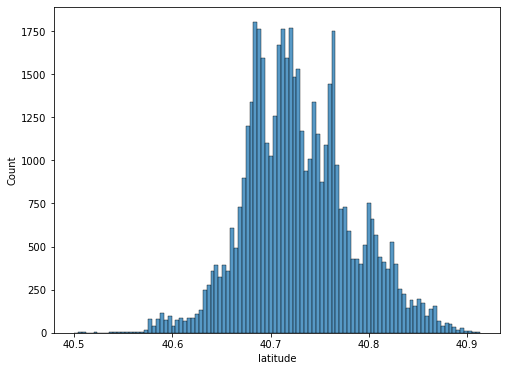

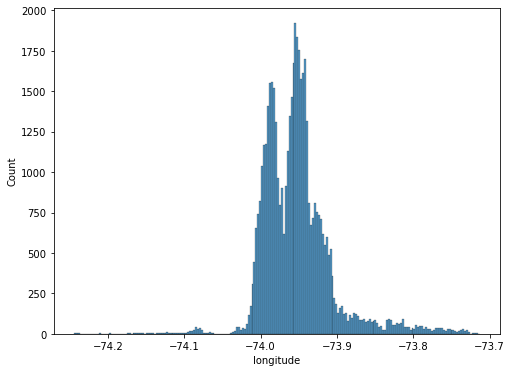

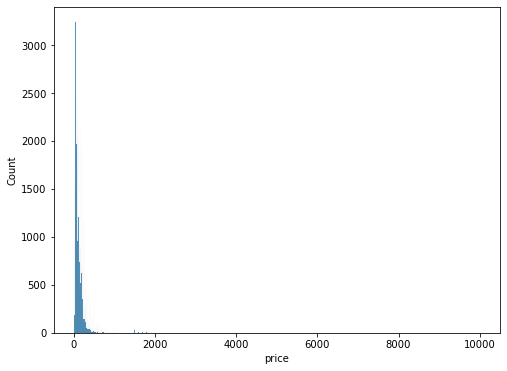

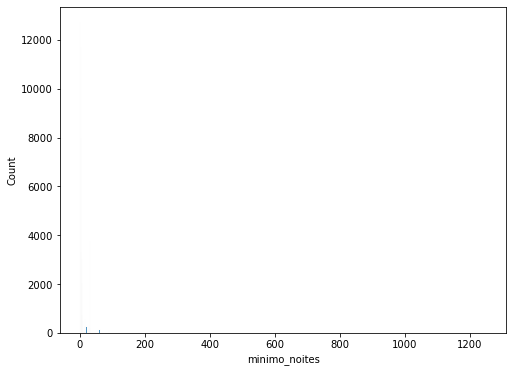

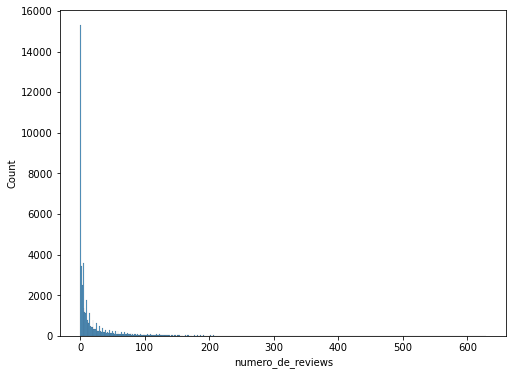

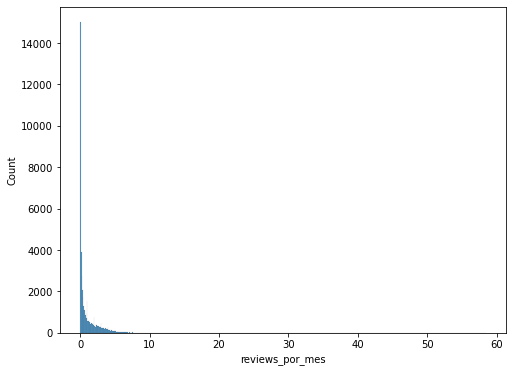

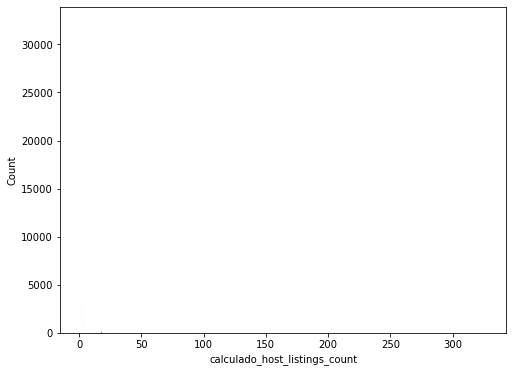

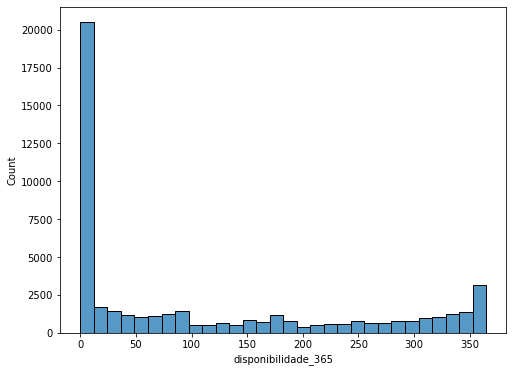

In [36]:
# Analisando variáveis contínuas: Distribuição, Média, Desvio e Amplitude

for i in quantitativas:
    print(i.upper())
    plt.figure(figsize = (8, 6))
    sns.histplot(df, x = i)
    plt.plot()
    
    print(f'Média: {df[i].mean()} \n Desvio: {df[i].std()} \n Amp: {df[i].max() - df[i].min()}')
    print('---------------------------------------')

Fora latitude e longitude, não se segue distribuição normal.

As outras features contém valores muito grandes que causam aumento nas estatisticas descritivas, possuindo cauda longa a direita.

### Qual a relação entre as variáveis

<AxesSubplot:>

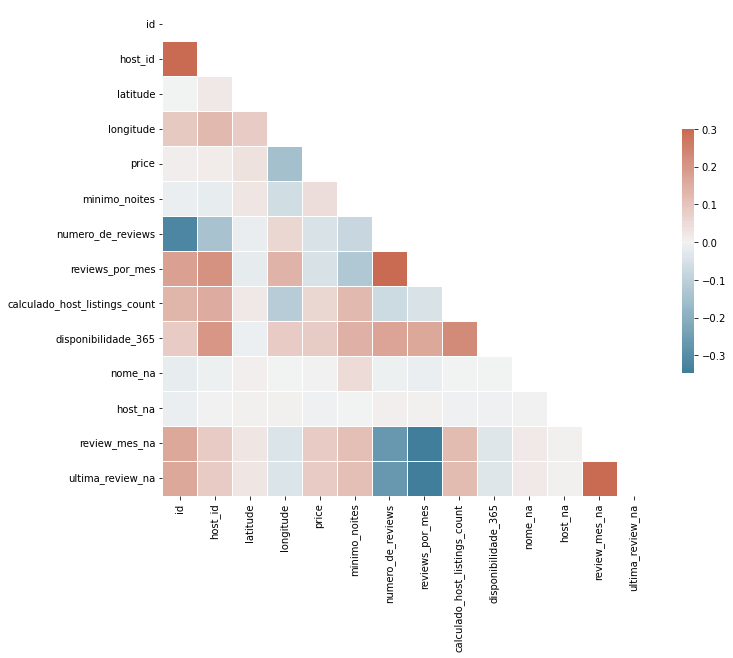

In [37]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Não há fortes correlações, não tem multicolinearidade. 

### Análise com base ao target: Preço

* Abaixo análise bivariada com relação ao preço. Começando com as variáveis categóricas:

['id', 'host_id', 'host_name','bairro_group', 'bairro','room_type', 'nome_na',
               'host_na','review_mes_na', 'ultima_review_na']

In [38]:
### Quais a faixa de preço de cada grupo de bairro
df.groupby(by ='bairro_group').agg(['mean', 'std','min','max'])['price'].sort_values(by = 'mean')

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\1093620705.py:2: FutureWarning: ['nome', 'host_name', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(by ='bairro_group').agg(['mean', 'std','min','max'])['price'].sort_values(by = 'mean')


,mean,std,min,max
bairro_group,,,,
Bronx,87.636777,106.694635,10.0,2500.0
Queens,99.517649,167.102155,10.0,10000.0
Staten Island,114.812332,277.620403,13.0,5000.0
Brooklyn,124.450362,186.860523,10.0,10000.0
Manhattan,196.882865,291.380266,10.0,10000.0


In [39]:
queen_preco = df.query('bairro_group == "Queens"')['price'].values
Brooklyn_preco = df.query('bairro_group == "Brooklyn"')['price'].values
Bronx_preco = df.query('bairro_group == "Queens"')['price'].values
Staten_preco = df.query('bairro_group == "Brooklyn"')['price'].values
Manhattan_preco = df.query('bairro_group == "Brooklyn"')['price'].values

#### Testando hipótese:

H1 = Brooklyn é mais caro que o Queens
H0 = Brooklyn tem mesmo preço que o Queens

<AxesSubplot:ylabel='Count'>

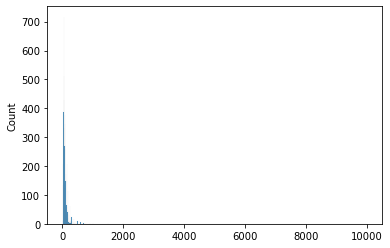

In [40]:
sns.histplot(queen_preco)

In [41]:
import numpy as np
from scipy.stats import poisson, kstest


# Ajuste a distribuição de Poisson aos dados observados
lambda_estimado = np.mean(Brooklyn_preco)
distribuicao_poisson = poisson(lambda_estimado)

# Realize o teste de aderência de Kolmogorov-Smirnov
estatistica_ks, valor_p = kstest(Brooklyn_preco, distribuicao_poisson.cdf)

# Exiba os resultados
print("Estatística KS:", estatistica_ks)
print("Valor-p:", valor_p)

# Tome uma decisão com base no valor-p
alfa = 0.05
if valor_p < alfa:
    print("Rejeitar H0: Os dados não seguem uma distribuição de Poisson.")
else:
    print("Falha em rejeitar H0: Não há evidência significativa para rejeitar que os dados seguem uma distribuição de Poisson.")

Estatística KS: 0.5714116887699893
Valor-p: 0.0
Rejeitar H0: Os dados não seguem uma distribuição de Poisson.


Como os dados não seguem uma distribuição de Poisson, mas segue valores não paramétricos, utilizarei um teste de mannwhitneyu para comparar os preços entre cada grupo

In [42]:
from scipy.stats import mannwhitneyu
def teste_mann(grupo1, grupo2):
    valor_comparacao = queen_preco.mean()

    estatistica_u, valor_p = mannwhitneyu(grupo1, grupo2, alternative='greater')

    alfa = 0.05

    if valor_p < alfa:
        print("Rejeitar H0: A média é significativamente diferente de", valor_comparacao)
    else:
        print("Falha em rejeitar H0: Não há evidência significativa de diferença na média")
        
teste_mann(Brooklyn_preco, queen_preco)


Rejeitar H0: A média é significativamente diferente de 99.51764913519237


In [43]:
teste_mann(Staten_preco, queen_preco)

Rejeitar H0: A média é significativamente diferente de 99.51764913519237


In [44]:
teste_mann(Brooklyn_preco,Staten_preco)

Falha em rejeitar H0: Não há evidência significativa de diferença na média


In [45]:
teste_mann(Manhattan_preco, Brooklyn_preco)  

Falha em rejeitar H0: Não há evidência significativa de diferença na média


In [46]:
teste_mann(Bronx_preco, queen_preco)

Falha em rejeitar H0: Não há evidência significativa de diferença na média


In [47]:
teste_mann(Manhattan_preco, Staten_preco)  

Falha em rejeitar H0: Não há evidência significativa de diferença na média


* Queens e Bronx tem a mesma média estatística de preço
* Staten Island é maior do que Queen. 
* Staten, Brooklyn e Manhattan tem mesma média estatística de preço

In [48]:
agg_bairro = df.groupby(by ='bairro_group').agg(['mean', 'std','min','max'])['price'].sort_values(by = 'mean', 
                                                                                                  ascending = False)
agg_bairro

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\3965326074.py:1: FutureWarning: ['nome', 'host_name', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_bairro = df.groupby(by ='bairro_group').agg(['mean', 'std','min','max'])['price'].sort_values(by = 'mean',


,mean,std,min,max
bairro_group,,,,
Manhattan,196.882865,291.380266,10.0,10000.0
Brooklyn,124.450362,186.860523,10.0,10000.0
Staten Island,114.812332,277.620403,13.0,5000.0
Queens,99.517649,167.102155,10.0,10000.0
Bronx,87.636777,106.694635,10.0,2500.0


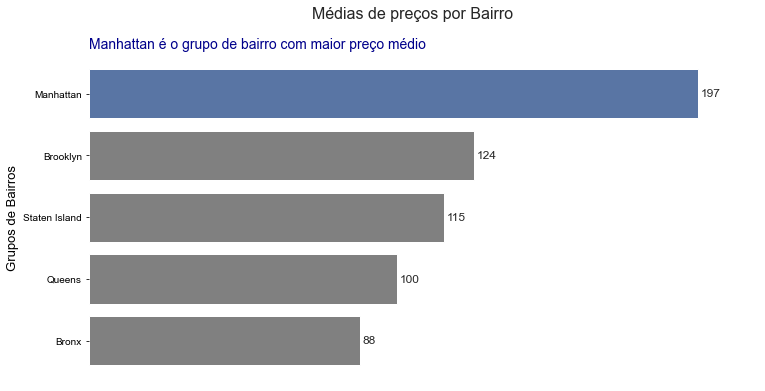

In [49]:
def barra(dados, colunax, sub, titulo, ylabel, Qnt_indices):

    fig = plt.subplots(figsize = (12, 6))
    sns.set_theme(style="whitegrid")

    cores = ['gray'] * Qnt_indices
    cores[0] = 'b'
    ax = sns.barplot(x=colunax, y=dados.index, data=dados,
                label="Total", palette = cores)
    plt.grid(False)

    plt.suptitle(sub, fontsize = 16, y = 0.99)
    plt.ylabel(ylabel, fontsize = 13)
    plt.title(titulo, fontsize = 14, loc = 'left', color = 'darkblue')


    plt.gca().get_xaxis().set_visible(False)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
    ax.spines['left'].set_color('none')
    plt.margins(x=0.1)
    for i, barra in enumerate(ax.patches):
        valor = dados[colunax].iloc[i]
        largura_barra = barra.get_width()
        ax.text(largura_barra +1 , barra.get_y() + barra.get_height() / 2, f'{round(valor)}', va='center')
    plt.plot()

barra(agg_bairro, 'mean', 'Médias de preços por Bairro','Manhattan é o grupo de bairro com maior preço médio',
     'Grupos de Bairros', 5)

### Agrupando por Tipo

In [50]:
agg_quarto = df.groupby(by ='room_type').agg(['mean','min','max'])['price'].sort_values(by = 'mean', 
                                                                                                  ascending = False)
agg_quarto

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\3937570904.py:1: FutureWarning: ['nome', 'host_name', 'bairro_group', 'bairro', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_quarto = df.groupby(by ='room_type').agg(['mean','min','max'])['price'].sort_values(by = 'mean',


,mean,min,max
room_type,,,
Entire home/apt,211.806269,10.0,10000.0
Private room,89.826209,10.0,10000.0
Shared room,70.390949,10.0,1800.0


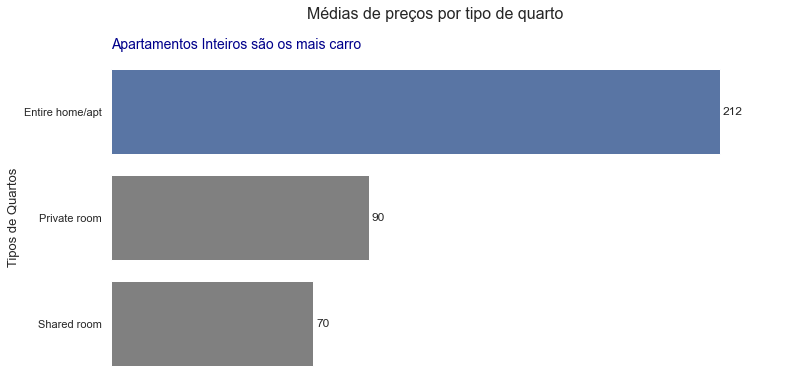

In [51]:
barra(agg_quarto, 'mean', 'Médias de preços por tipo de quarto','Apartamentos Inteiros são os mais carro',
     'Tipos de Quartos', 3)

### Vendo se o preço aumenta em dados faltantes

1 - Faltante

0 - Não faltante

In [52]:
colunas_na = ['nome_na', 'host_na','review_mes_na', 'ultima_review_na']

for i in colunas_na:
    agg_miss = df.groupby(by =i).agg(['mean','min','max'])['price'].sort_values(by = 'mean', ascending = False)
    print(agg_miss)

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\908961217.py:4: FutureWarning: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_miss = df.groupby(by =i).agg(['mean','min','max'])['price'].sort_values(by = 'mean', ascending = False)


               mean   min      max
nome_na                           
0        152.756805  10.0  10000.0
1        147.625000  40.0    400.0


C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\908961217.py:4: FutureWarning: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_miss = df.groupby(by =i).agg(['mean','min','max'])['price'].sort_values(by = 'mean', ascending = False)


               mean   min      max
host_na                           
0        152.773087  10.0  10000.0
1        110.952381  28.0    325.0


C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\908961217.py:4: FutureWarning: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_miss = df.groupby(by =i).agg(['mean','min','max'])['price'].sort_values(by = 'mean', ascending = False)


                     mean   min      max
review_mes_na                           
1              192.934217  10.0  10000.0
0              142.357097  10.0  10000.0
                        mean   min      max
ultima_review_na                           
1                 192.934217  10.0  10000.0
0                 142.357097  10.0  10000.0


C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\908961217.py:4: FutureWarning: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_miss = df.groupby(by =i).agg(['mean','min','max'])['price'].sort_values(by = 'mean', ascending = False)


* Estou vendo que:

1. A falta de nome do apto e do host diminui o valor médio.
2. A falta de review aumenta o valor médio. 

#### Ideia de Negócio: 
1. Podemos selecionar apartamentos que estão sem review, e sugerir ao host que abaixe o preço abaixo para aumentar a chance de locação.
2. Podemos adicionar alertas aos hosts para adicionar seus nomes ao apartamento, informando que assim agrega mais valor.
3. Podemos adicionar alertas aos hosts para adicionar nomes aos quartos, além de criar dar sugestões baseadas em outros quartos.

### Análise com base ao target: Preço - Quantitativas

'latitude',
 'longitude',
 'price',
 'minimo_noites',
 'numero_de_reviews',
 'reviews_por_mes',
 'calculado_host_listings_count',
 'disponibilidade_365'

In [53]:
def lineplot(x, y):
    #ax, fig = plt.subplots(figsize = (10, 8))
    plt.figsize = (10, 8)
    ax = sns.lmplot(data=dados, x=x, y=y)
    plt.grid(False)
    plt.show()

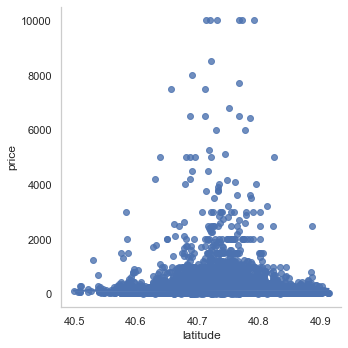

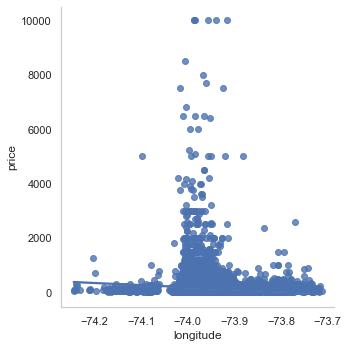

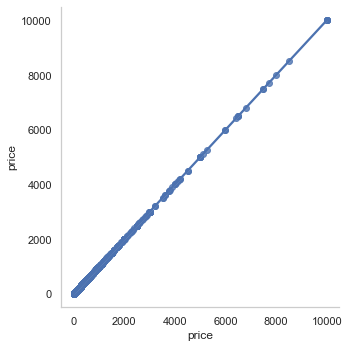

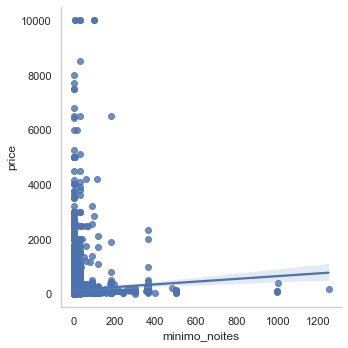

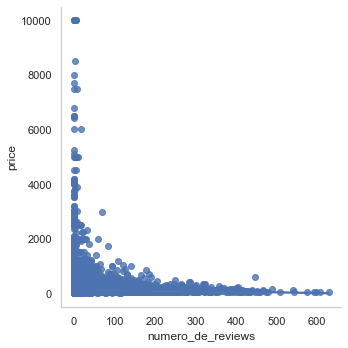

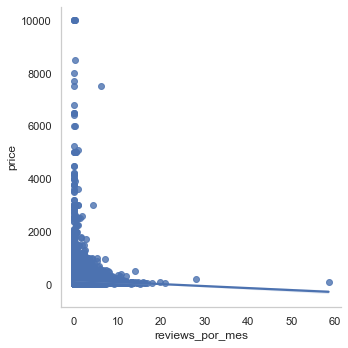

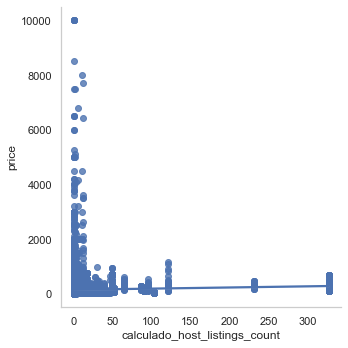

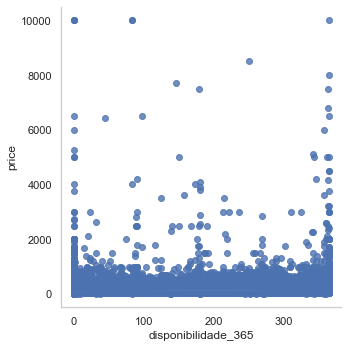

In [54]:
for i in quantitativas:
    lineplot(x=i, y='price')

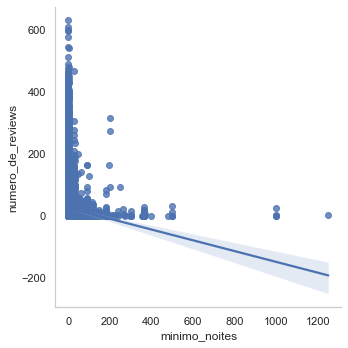

In [55]:
lineplot(x='minimo_noites', y='numero_de_reviews')

Pelos gráficos:
1. Não existe forte correlação para o aumento de preço nas variáveis quantitativas
2. Existe aglomeração em aptos com menores preços e menores valores nas variáveis.
3. Aptos com mais reviews tendem a ter menores preços.
4. Aptos com mais noites mínimos tendem a ter os menores preços.

#### Ideias e hipóteses de negócio com base nesses gráficos:
1. Clientes com baixa quantitade de review tende a aumentar o preço, talvez porque sejam hosts novos e não alugaram bastante os aptos. Portanto, podemos sugerir a clientes novos a colocar preço mais baixos e ir aumentando de acordo que ganham reviews.
2. Para aumentar o número de review (consequentimento aumentar o número de locações), podemos sugerir ao host diminuir o mínumero de noites para menos de 200. E com o ganho de reviews ir aumentando o mínimo de noites.

### Respondendo Perguntas:
1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Para indicar a melhor compra temos que definir o que é melhor: Preço baixo ou alta, reconhecido ou não pelas pessoas. 

* Vou definir melhor como um apartamento com preço médio, e que tenha reviews de outras pessoas.

In [56]:
df_apt = dados[dados['room_type'] == 'Entire home/apt']
df_apt.head(2)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00,4.64,1,194,0,0,0,0


In [57]:
df_apt.groupby(by ='bairro_group').agg(['mean', 'count'])['price'].sort_values(by = 'mean', ascending = False)

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\2332726381.py:1: FutureWarning: ['nome', 'host_name', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_apt.groupby(by ='bairro_group').agg(['mean', 'count'])['price'].sort_values(by = 'mean', ascending = False)


,mean,count
bairro_group,,
Manhattan,249.250682,13199
Brooklyn,178.343523,9559
Staten Island,173.846591,176
Queens,147.050573,2096
Bronx,127.506596,379


In [58]:
df_apt.groupby(by ='bairro_group').agg(['mean', 'count'])['numero_de_reviews'].sort_values(by = 'mean', ascending = False)

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\132767806.py:1: FutureWarning: ['nome', 'host_name', 'bairro', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_apt.groupby(by ='bairro_group').agg(['mean', 'count'])['numero_de_reviews'].sort_values(by = 'mean', ascending = False)


,mean,count
bairro_group,,
Staten Island,33.278409,176
Bronx,30.678100,379
Queens,28.933206,2096
Brooklyn,27.945183,9559
Manhattan,17.815516,13199


In [59]:
df_apt_bairro = df_apt[df_apt['bairro_group'] == 'Staten Island']
df_apt_bairro.groupby(by ='bairro').agg(['mean', 'count'])['numero_de_reviews'].sort_values(by = 'mean', ascending = False).head(5)

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\140844250.py:2: FutureWarning: ['nome', 'host_name', 'bairro_group', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_apt_bairro.groupby(by ='bairro').agg(['mean', 'count'])['numero_de_reviews'].sort_values(by = 'mean', ascending = False).head(5)


,mean,count
bairro,,
Silver Lake,147.000000,1
Clifton,80.375000,8
Richmondtown,79.000000,1
West Brighton,60.800000,5
Huguenot,55.666667,3


In [60]:
df_apt_bairro.groupby(by ='bairro').agg(['mean', 'count'])['price'].sort_values(by = 'mean', ascending = False).head(5)

C:\Users\kauea\AppData\Local\Temp\ipykernel_14164\25094993.py:1: FutureWarning: ['nome', 'host_name', 'bairro_group', 'room_type', 'ultima_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_apt_bairro.groupby(by ='bairro').agg(['mean', 'count'])['price'].sort_values(by = 'mean', ascending = False).head(5)


,mean,count
bairro,,
Fort Wadsworth,800.000000,1
Woodrow,700.000000,1
Randall Manor,651.000000,9
Prince's Bay,506.666667,3
South Beach,275.000000,1


#### Melhor local de apartamento para alugar: 
* Baseando que a pessoa quer o melhor local para alugar, considerei que melhor o local com maior número de reviews e com grupo de bairro de preço médio. O lugar é: **Staten Island, no bairro de Silver Lake**. O preço médio é de $173, e possui 147 reviews.

#### Pergunta 2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

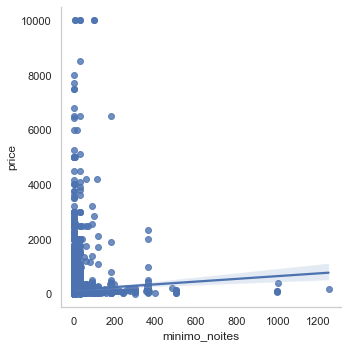

In [61]:
lineplot(x='minimo_noites', y='price')

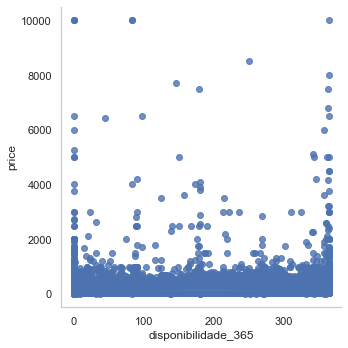

In [62]:
lineplot(x='disponibilidade_365', y='price')

In [63]:
df_corr = dados[['minimo_noites', 'disponibilidade_365', 'price']]
df_corr.corr()

,minimo_noites,disponibilidade_365,price
minimo_noites,1.000000,0.144320,0.042804
disponibilidade_365,0.144320,1.000000,0.081845
price,0.042804,0.081845,1.000000


#### Resposta:
* Baseando nos gráficos e nos valores de correlação entre preço e variáveis, conclui-se que o **tempo mínimo de noites e a disponibilidade não tem interferência significativa no preço.** 

#### Respondendo a c: Existe algum padrão no texto do nome do local para lugares de mais alto valor?

1. Usarei como local de mais alto valor os locais que estão acima da mediana (média= 152.8). Isto se deve ao fato do preço ser uma distribuição de cauda longa à direita, fazendo com que a média seja maior que a mediana.

In [64]:
df['price'].describe()

count    48894.000000
mean       152.755125
std        240.145697
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [65]:
df_alto_valor = df[df['price']>152.8]
df_alto_valor = df_alto_valor[['nome','price']]
df_alto_valor.head(3)

,nome,price
0,Skylit Midtown Castle,225.0
4,Large Cozy 1 BR Apartment In Midtown East,200.0
15,Perfect for Your Parents + Garden,215.0


In [66]:
df_baixo_valor = df[df['price']<=152.8]
df_baixo_valor = df_baixo_valor[['nome','price']]

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re

In [68]:
## Criando Bag of Words
texto  = ['testando o teste','testando a camisa' ]
vetorizar = CountVectorizer(lowercase = False)
bag_of_words  = vetorizar.fit_transform(texto)
bag_of_words

<2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [69]:
matriz_sparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns =vetorizar.get_feature_names_out())
matriz_sparsa

,camisa,testando,teste
0,0,1,1
1,1,1,0


In [70]:
def remover (textos, regex):
    #print(textos)
    if type(textos) == str:
        print('entrou 1')
        return regex.sub("", textos)

    else:  ## Se for uma lista de textos
        print('entrou 2')
        return [regex.sub("", texto) for texto in textos]

In [71]:
len(df_alto_valor['nome'].values)

14879

In [72]:
regex_pontuacao = re.compile(r"[^\w\s]")
a = remover(df_alto_valor.nome, regex_pontuacao)
df_alto_valor['nome_n'] = a

entrou 2


In [73]:
df_alto_valor.head(10)

,nome,price,nome_n
0,Skylit Midtown Castle,225.0,Skylit Midtown Castle
4,Large Cozy 1 BR Apartment In Midtown East,200.0,Large Cozy 1 BR Apartment In Midtown East
15,Perfect for Your Parents + Garden,215.0,Perfect for Your Parents Garden
18,Huge 2 BR Upper East Cental Park,190.0,Huge 2 BR Upper East Cental Park
19,Sweet and Spacious Brooklyn Loft,299.0,Sweet and Spacious Brooklyn Loft
28,Modern 1 BR / NYC / EAST VILLAGE,180.0,Modern 1 BR NYC EAST VILLAGE
51,* ORIGINAL BROOKLYN LOFT *,228.0,ORIGINAL BROOKLYN LOFT
53,Beautiful Apartment in Manhattan!!!,200.0,Beautiful Apartment in Manhattan
58,**Bright Nolita Apt w Doorman/Elevators/Gym**,180.0,Bright Nolita Apt w DoormanElevatorsGym
60,Sunny & Spacious Chelsea Apartment,375.0,Sunny Spacious Chelsea Apartment


* Tratamentos importantes:
1. Deixar tudo minúsculo
2. Retirar stopwords

In [74]:
regex_espaco = re.compile(r" +")
regex_barra = re.compile(r'/')
def substituir_por_espaco (textos, regex):
    if type(textos) == str:
        return regex.sub(" ", textos)

    else:  ## Se for uma lista de textos
        return [regex.sub(" ", texto) for texto in textos]
    
def minusculo (textos):
    if type(textos) == str:
        return textos.lower

    else:  ## Se for uma lista de textos
        return [texto.lower() for texto in textos]
    
    
a = substituir_por_espaco(df_alto_valor.nome, regex_barra)
print(a[8])
a = remover(a, regex_pontuacao)
a = minusculo(a)
a = substituir_por_espaco(a, regex_espaco)
df_alto_valor['nome_n'] = a

**Bright Nolita Apt w Doorman Elevators Gym**
entrou 2


In [75]:
regex_espaco = re.compile(r" +")
regex_barra = re.compile(r'/')
def substituir_por_espaco (textos, regex):
    if type(textos) == str:
        return regex.sub(" ", textos)

    else:  ## Se for uma lista de textos
        return [regex.sub(" ", texto) for texto in textos]
    
def minusculo (textos):
    if type(textos) == str:
        return textos.lower

    else:  ## Se for uma lista de textos
        return [texto.lower() for texto in textos]
    
    
b = substituir_por_espaco(df_baixo_valor.nome, regex_barra)
print(a[8])
b = remover(b, regex_pontuacao)
b = minusculo(b)
b = substituir_por_espaco(b, regex_espaco)
df_baixo_valor['nome_n'] = b

bright nolita apt w doorman elevators gym
entrou 2


In [76]:
df_alto_valor.head(10)

,nome,price,nome_n
0,Skylit Midtown Castle,225.0,skylit midtown castle
4,Large Cozy 1 BR Apartment In Midtown East,200.0,large cozy 1 br apartment in midtown east
15,Perfect for Your Parents + Garden,215.0,perfect for your parents garden
18,Huge 2 BR Upper East Cental Park,190.0,huge 2 br upper east cental park
19,Sweet and Spacious Brooklyn Loft,299.0,sweet and spacious brooklyn loft
28,Modern 1 BR / NYC / EAST VILLAGE,180.0,modern 1 br nyc east village
51,* ORIGINAL BROOKLYN LOFT *,228.0,original brooklyn loft
53,Beautiful Apartment in Manhattan!!!,200.0,beautiful apartment in manhattan
58,**Bright Nolita Apt w Doorman/Elevators/Gym**,180.0,bright nolita apt w doorman elevators gym
60,Sunny & Spacious Chelsea Apartment,375.0,sunny spacious chelsea apartment


In [77]:
df_baixo_valor.head(10)

,nome,price,nome_n
1,THE VILLAGE OF HARLEM....NEW YORK !,150.0,the village of harlemnew york
2,Cozy Entire Floor of Brownstone,89.0,cozy entire floor of brownstone
3,Entire Apt: Spacious Studio/Loft by central park,80.0,entire apt spacious studio loft by central park
5,BlissArtsSpace!,60.0,blissartsspace
6,Large Furnished Room Near B'way,79.0,large furnished room near bway
7,Cozy Clean Guest Room - Family Apt,79.0,cozy clean guest room family apt
8,Cute & Cozy Lower East Side 1 bdrm,150.0,cute cozy lower east side 1 bdrm
9,Beautiful 1br on Upper West Side,135.0,beautiful 1br on upper west side
10,Central Manhattan/near Broadway,85.0,central manhattan near broadway
11,"Lovely Room 1, Garden, Best Area, Legal rental",89.0,lovely room 1 garden best area legal rental


In [78]:
from nltk import tokenize, corpus
token_pontuacao = tokenize.WordPunctTokenizer()

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kauea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
palavras_irrelevantes = corpus.stopwords.words("english")
len(palavras_irrelevantes)

179

In [81]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()

for opiniao in a:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)

    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)

    frase_processada.append(' '.join(nova_frase))


df_alto_valor['nome_n'] = frase_processada
df_alto_valor.head(10)

,nome,price,nome_n
0,Skylit Midtown Castle,225.0,skylit midtown castle
4,Large Cozy 1 BR Apartment In Midtown East,200.0,large cozy 1 br apartment midtown east
15,Perfect for Your Parents + Garden,215.0,perfect parents garden
18,Huge 2 BR Upper East Cental Park,190.0,huge 2 br upper east cental park
19,Sweet and Spacious Brooklyn Loft,299.0,sweet spacious brooklyn loft
28,Modern 1 BR / NYC / EAST VILLAGE,180.0,modern 1 br nyc east village
51,* ORIGINAL BROOKLYN LOFT *,228.0,original brooklyn loft
53,Beautiful Apartment in Manhattan!!!,200.0,beautiful apartment manhattan
58,**Bright Nolita Apt w Doorman/Elevators/Gym**,180.0,bright nolita apt w doorman elevators gym
60,Sunny & Spacious Chelsea Apartment,375.0,sunny spacious chelsea apartment


In [82]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()

for opiniao in b:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)

    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)

    frase_processada.append(' '.join(nova_frase))

df_baixo_valor['nome_n'] = frase_processada
df_baixo_valor.head(10)

,nome,price,nome_n
1,THE VILLAGE OF HARLEM....NEW YORK !,150.0,village harlemnew york
2,Cozy Entire Floor of Brownstone,89.0,cozy entire floor brownstone
3,Entire Apt: Spacious Studio/Loft by central park,80.0,entire apt spacious studio loft central park
5,BlissArtsSpace!,60.0,blissartsspace
6,Large Furnished Room Near B'way,79.0,large furnished room near bway
7,Cozy Clean Guest Room - Family Apt,79.0,cozy clean guest room family apt
8,Cute & Cozy Lower East Side 1 bdrm,150.0,cute cozy lower east side 1 bdrm
9,Beautiful 1br on Upper West Side,135.0,beautiful 1br upper west side
10,Central Manhattan/near Broadway,85.0,central manhattan near broadway
11,"Lovely Room 1, Garden, Best Area, Legal rental",89.0,lovely room 1 garden best area legal rental


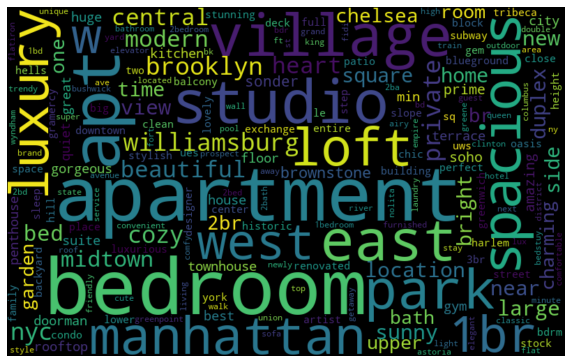

In [83]:
def word_cloud(palavras):
    nuvem_palavras = WordCloud(width = 800,
                           height = 500, max_font_size = 110, collocations = False).generate(palavras)

    plt.figure(figsize = (10,8))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
palavras = ' '.join([text for text in df_alto_valor['nome_n']])
word_cloud(palavras)


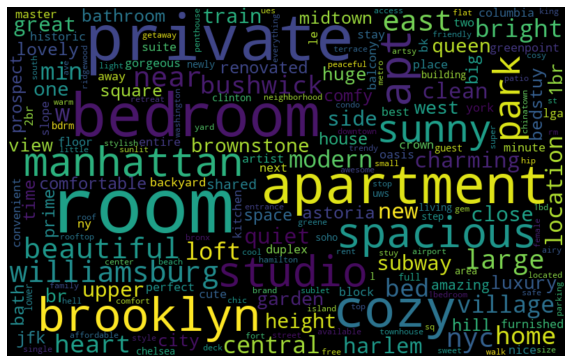

In [84]:
def word_cloud(palavras):
    nuvem_palavras = WordCloud(width = 800,
                           height = 500, max_font_size = 110, collocations = False).generate(palavras)

    plt.figure(figsize = (10,8))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
palavras = ' '.join([text for text in df_baixo_valor['nome_n']])
word_cloud(palavras)

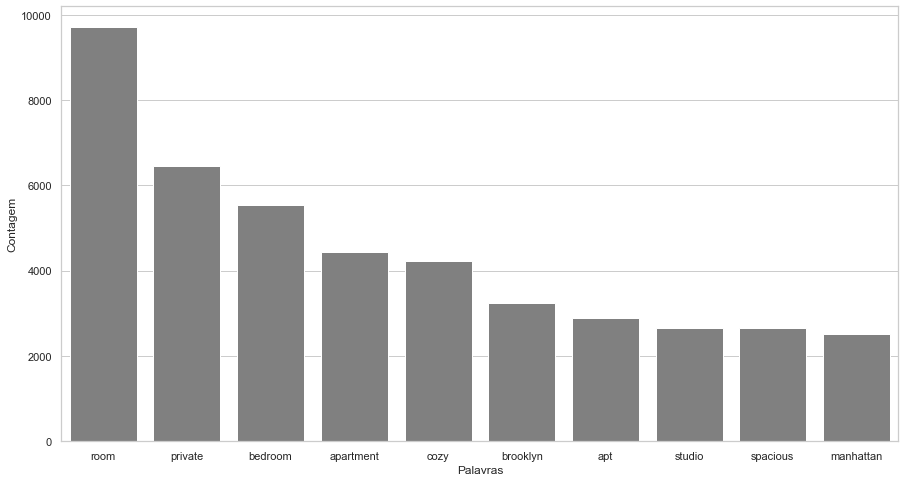

In [85]:
def pareto(texto, coluna_texto, quantidade):

    todas_palavras = ' '.join([text for text in texto[coluna_texto]])
    token_palavras = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_palavras)
    df_frequencia = pd.DataFrame({'Palavras':list(frequencia.keys()), 'Frequencia':list(frequencia.values())})


    plt.figure(figsize = (15, 8))

    ax = sns.barplot(data = df_frequencia.nlargest(columns = 'Frequencia', n = quantidade), x = 'Palavras',
                     y = 'Frequencia', color = 'gray')
    ax.set(ylabel = 'Contagem')

    plt.show()

    
pareto(df_baixo_valor, 'nome_n', 10)

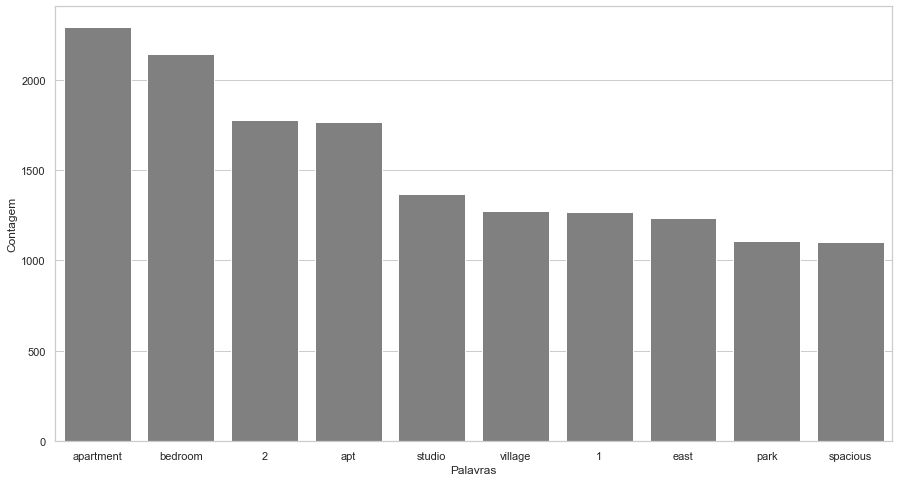

In [86]:
pareto(df_alto_valor, 'nome_n', 10)

#### Resposta:
* Baseando nos gráficos temos: 
1. Existem palavras que repetem tanto abaixo da média quanto acima: Apartment, Bedroom,apt, studio, spacius.
2. As palavras iguais são menos frequentes no grupo acima da média. E os acima da média não utilizam muito a palavra room.
3. O grupo abaixo da média utiliza palavra da localização: Brooklyn e Manhattan. 
4. É mais comum ao grupo abaixo da média utilizar numerais no texto.

OBS: Lembrando que o uso das palavras não indica que o apartamento será alocado por um preço maior, e sim apresenta um comportamento comparativo entre os grupos.

# Machine Learning

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### ScikitLearn

from sklearn.model_selection import train_test_split,cross_validate, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


#Category Encoder
import category_encoders as ce

In [88]:
dados = pd.read_csv('dados_tratados.csv')
df = dados.copy()
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365,0,0,1,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00,4.64,1,194,0,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00,0.10,1,0,0,0,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22 00:00:00,0.59,1,129,0,0,0,0


## Preparação dos Dados
1. O id,  host id e o nome possuem alta cardinalidade. E significa que não serão bons valores para usar quando treinar o modelo. **Retirar esses dados**

### Remoção de Outliers
1. Da EDA sabemos que existem altos valores nos preços (> 500)

<AxesSubplot:>

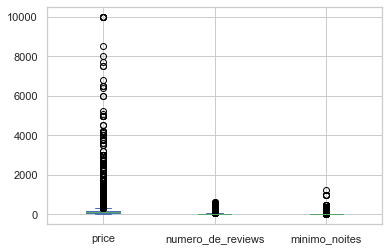

In [89]:
df[['price','numero_de_reviews','minimo_noites']].plot.box()

In [90]:
df.price.describe()

count    48894.000000
mean       152.755125
std        240.145697
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [91]:
df[df.price > 175]['price'].describe()

count    12177.000000
mean       335.295968
std        427.295561
min        176.000000
25%        200.000000
50%        250.000000
75%        325.000000
max      10000.000000
Name: price, dtype: float64

In [92]:
df_outlier = df[df.price <250 ]
df_outlier.head(2)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365,0,0,1,1


In [93]:
df_outlier[df_outlier['minimo_noites']>5]['minimo_noites'].describe()
df_outlier = df_outlier[df_outlier['minimo_noites']<200]
df_outlier.head(2)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365,0,0,1,1


In [94]:
df_outlier[df_outlier['numero_de_reviews']>300]['numero_de_reviews'].describe()
df_outlier = df_outlier[df_outlier['numero_de_reviews']<200]
df_outlier.head(2)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,nome_na,host_na,review_mes_na,ultima_review_na
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00,0.38,2,355,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365,0,0,1,1


In [95]:
print(len(df_outlier['id'].unique()))
print(len(df_outlier['nome'].unique()))
print(len(df_outlier['host_id'].unique()))
print(len(df_outlier['host_name'].unique()))

41983
41118
32556
10392


In [96]:
#Separando treino, teste e validação
X = df_outlier.drop(columns = 'price')
Y = df_outlier.price

x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_teste, y_val, y_teste = train_test_split(X, Y, test_size=0.3, random_state=42)

In [98]:
def pipeline_drop(x_treino, y_treino, x_teste, y_teste,modelo):
    #Drop das colunas:
    colunas_a_remover = ['id', 'host_id','nome', 'ultima_review']
    x_train = x_treino.drop(columns =colunas_a_remover, axis = 1)
    x_test = x_teste.drop(columns =colunas_a_remover, axis = 1)
    
    
    #### Target Encoding
    colunas_encode = ['host_name','bairro', 'room_type']
    encode = ce.target_encoder.TargetEncoder(cols = colunas_encode, return_df = True)
    transformador_coluna = ColumnTransformer(
    transformers=[
        ('te', encode, colunas_encode),
        ('HotEncode', OneHotEncoder(), ['bairro_group'])# Aplic>ar Target Encoder às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
    )
    
    final_transformer = Pipeline(steps=[
    ('Encoder', transformador_coluna)# Adiciona este estágio para dropar as colunas especificadas
    ])



    pipeline_completa = Pipeline([
    ('Preprocessamento',final_transformer),
    ('Scaler', MinMaxScaler()),
    ('model',modelo)
    ])
    
    
    Fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    cv_results = cross_validate(pipeline_completa, x_train, y_treino, scoring=['r2'], cv=Fold)
    
    
    print(f"R2 de Treinamento: {cv_results['test_r2'].mean()}")
    pipeline_completa.fit(x_train, y_treino)
    y_predito = pipeline_completa.predict(x_teste)
    MSE = r2_score(y_teste, y_predito)
    print("R² = ", MSE,'\n')

In [99]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor

In [100]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
Rd = Ridge()
La = Lasso()

for i in [LR, DT, Rd, La]:
    pipeline_drop(x_treino, y_treino, x_teste, y_teste, i)

R2 de Treinamento: 0.5503359842504768
R² =  0.5657868214892592 

R2 de Treinamento: 0.20849490329293757
R² =  0.49105143125520023 

R2 de Treinamento: 0.5506827395506946
R² =  0.5659488477988412 

R2 de Treinamento: 0.5327011216119352
R² =  0.531148804677968 



1. rbf - não está dando resultado bom
2. Testar DT
3. LR está o melhor


In [101]:
GB = GradientBoostingRegressor()
GP = GaussianProcessRegressor()
HGB = HistGradientBoostingRegressor()
SGD = SGDRegressor()
for i in [SGD, HGB]:
    pipeline_drop(x_treino, y_treino, x_teste, y_teste, i)

R2 de Treinamento: 0.5536649391688815
R² =  0.5668348599013178 

R2 de Treinamento: 0.5758883546678458
R² =  0.6262443102170591 



* Vamos realizar a otimização por Hiperparâmetros no HistGradientBoosting pois: 
1. Ele tem o melhor treinamento por validação cruzada e o melhor resultado no teste. 
2. Ele não apresenta diferença no treino e teste, mostrando não haver under ou overfitting

In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def pipeline_otimizando(x_treino, y_treino, x_teste, y_teste, modelo, param_grid):
    #Drop das colunas:
    colunas_a_remover = ['id', 'host_id','nome', 'ultima_review']
    x_train = x_treino.drop(columns =colunas_a_remover, axis = 1)
    x_test = x_teste.drop(columns =colunas_a_remover, axis = 1)
    
    
    #### Target Encoding
    colunas_encode = ['host_name','bairro', 'room_type']
    encode = ce.target_encoder.TargetEncoder(cols = colunas_encode, return_df = True)
    transformador_coluna = ColumnTransformer(
    transformers=[
        ('te', encode, colunas_encode),
        ('HotEncode', OneHotEncoder(), ['bairro_group'])# Aplic>ar Target Encoder às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
    )
    
    final_transformer = Pipeline(steps=[
    ('Encoder', transformador_coluna)# Adiciona este estágio para dropar as colunas especificadas
    ])



    pipeline_completa = Pipeline([
    ('Preprocessamento',final_transformer),
    ('Scaler', MinMaxScaler()),
    ('model',modelo)
    ])
    
    
    Fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    grid_search = RandomizedSearchCV(pipeline_completa, param_grid, scoring='r2', cv=Fold)
    
    
    grid_search.fit(x_train, y_treino)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(grid_search.best_score_)

In [118]:
param_grid = {
    'model__loss': ['squared_error', 'poisson', 'absolute_error'],
    'model__learning_rate': [0.1, 0.15 ,0.2,0.25, 0.3],
    'model__max_iter': [x for x in range(90, 110)],
    'model__max_depth': [x for x in range(3, 15)],
    'model__max_leaf_nodes' : [x for x in range(25, 35)],
    'model__min_samples_leaf': [x for x in range(15, 25)],
    'model__max_bins': [x for x in range(230, 255)]
    }

param_grid2 = {
    'model__loss': ['squared_error', 'poisson'],
    'model__learning_rate': [0.1 ,0.2, 0.3],
    'model__max_iter': [x for x in range(99, 101)],
    'model__max_depth': [x for x in range(3, 7)],
    }

HGB = HistGradientBoostingRegressor()
pipeline_otimizando(x_treino, y_treino, x_teste, y_teste, HGB, param_grid2)


Best Parameters: {'model__max_iter': 100, 'model__max_depth': 6, 'model__loss': 'squared_error', 'model__learning_rate': 0.2}
0.5761081014593517


In [104]:
HGB = HistGradientBoostingRegressor()
pipeline_otimizando(x_treino, y_treino, x_teste, y_teste, HGB, param_grid)

Best Parameters: {'model__min_samples_leaf': 17, 'model__max_leaf_nodes': 33, 'model__max_iter': 92, 'model__max_depth': 10, 'model__max_bins': 234, 'model__loss': 'poisson', 'model__learning_rate': 0.25}
0.5739710867037584


In [126]:
def pipeline_otimizado(x_treino, y_treino, x_val, y_val,modelo):
    #Drop das colunas:
    colunas_a_remover = ['id', 'host_id','nome', 'ultima_review']
    x_train = x_treino.drop(columns =colunas_a_remover, axis = 1)
    x_val2 = x_val.drop(columns =colunas_a_remover, axis = 1)
    
    
    #### Target Encoding
    colunas_encode = ['host_name','bairro', 'room_type']
    encode = ce.target_encoder.TargetEncoder(cols = colunas_encode, return_df = True)
    transformador_coluna = ColumnTransformer(
    transformers=[
        ('te', encode, colunas_encode),
        ('HotEncode', OneHotEncoder(), ['bairro_group'])# Aplic>ar Target Encoder às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
    )
    
    final_transformer = Pipeline(steps=[
    ('Encoder', transformador_coluna)# Adiciona este estágio para dropar as colunas especificadas
    ])



    pipeline_completa = Pipeline([
    ('Preprocessamento',final_transformer),
    ('Scaler', MinMaxScaler()),
    ('model', modelo)
    ])

    pipeline_completa.fit(x_train, y_treino)
    y_predito = pipeline_completa.predict(x_val2)
    MSE = r2_score(y_val, y_predito)
    print("R² = ", MSE,'\n')
    return pipeline_completa


HGB_otiz = HistGradientBoostingRegressor(learning_rate= 0.2,loss= 'squared_error',max_depth= 5, max_iter= 99)
pipe = pipeline_otimizado(x_treino, y_treino, x_val, y_val, HGB_otiz)

R² =  0.7005301488740112 



## Resultado do Modelo
* O modelo tem um ajuste com coeficiente R² = 70% nos dados de validação. O que significa que o modelo obteve boa performace em predizer os preços. 
* Não houve overfitting nem underfitting. 


# Criando o Preditor final

In [127]:
import pickle

with open('pipeline_otimizada.pkl', 'wb') as file:
    pickle.dump(pipe, file)
dados_indicium = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


In [128]:
def preditor(dados_novos):
    df_novo = pd.DataFrame(dados_indicium, index = range(0, 1))
    #Adicionar Colunas:
    for i in ['nome','host_id', 'reviews_por_mes', 'ultima_review']:
        if df_novo[i].isna()[0]:
            
            if i =='reviews_por_mes':
                df_novo['review_mes_na'] = 1
                
            elif i == 'host_id': 
                df_novo['host_na'] = 1
                
            else : df_novo[i +'_na'] = 1
                
        else: 
            if i =='reviews_por_mes':
                df_novo['review_mes_na'] = 0
                
            elif i == 'host_id': 
                df_novo['host_na'] = 0
            else : df_novo[i +'_na'] = 0
            
    
    ## Retirar colunas não usadas
    df_novo.drop(columns = ['id', 'host_id','nome', 'ultima_review'], axis = 1, inplace = True)
    
    ## Carregar Pipeline
    with open('pipeline_otimizada.pkl', 'rb') as file:
        pipeline_carregada = pickle.load(file)
        
    pred = pipeline_carregada.predict(df_novo)
    print(pred[0])
    
preditor(dados_indicium)

192.99502879134738


In [129]:
with open('preditor.pkl', 'wb') as file:
    pickle.dump(preditor, file)

In [130]:
with open('preditor.pkl', 'rb') as file:
    preditor = pickle.load(file)
    
preditor(dados_indicium)

192.99502879134738
